In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df = pd.read_csv('datahouse20.csv')

In [3]:
df2 = df.drop_duplicates()

In [4]:
df2.shape

(5904, 5)

In [5]:
df2['location'].str.lower()


0       motijheelextension,motijheel,dhaka
1       motijheelextension,motijheel,dhaka
3                     sector5,uttara,dhaka
4              blockg,bashundharar-a,dhaka
5          eastmaniknagar,maniknagar,dhaka
                       ...                
8715           middlepaikpara,mirpur,dhaka
8716                 sector13,uttara,dhaka
8717           blockf,bashundharar-a,dhaka
8718                section12,mirpur,dhaka
8719                  sector9,uttara,dhaka
Name: location, Length: 5904, dtype: object

In [8]:
df2['loc'] = df2['location'].str.split(',',n=0,expand=True)

<ipython-input-8-c268f52989f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['loc'] = df2['location'].str.split(',',n=0,expand=True)


In [9]:
df2.head()

,location,bedrooms,bath,size,price,loc
0,"MotijheelExtension,Motijheel,Dhaka",3.0,2.0,1750,9500000,MotijheelExtension
1,"MotijheelExtension,Motijheel,Dhaka",3.0,2.0,1615,9500000,MotijheelExtension
3,"Sector5,Uttara,Dhaka",2.0,2.0,807,5200000,Sector5
4,"BlockG,BashundharaR-A,Dhaka",4.0,4.0,3100,40000000,BlockG
5,"EastManiknagar,Maniknagar,Dhaka",3.0,3.0,1300,6600000,EastManiknagar


In [10]:
df3=df2.drop(columns=['location'])

In [11]:
df3

,bedrooms,bath,size,price,loc
0,3.0,2.0,1750,9500000,MotijheelExtension
1,3.0,2.0,1615,9500000,MotijheelExtension
3,2.0,2.0,807,5200000,Sector5
4,4.0,4.0,3100,40000000,BlockG
5,3.0,3.0,1300,6600000,EastManiknagar
...,...,...,...,...,...
8715,3.0,2.0,1025,4000000,MiddlePaikpara
8716,4.0,4.0,3000,32500000,Sector13
8717,3.0,4.0,1695,13500000,BlockF
8718,3.0,3.0,1150,4500000,Section12


In [12]:
df3.sort_values('size')

,bedrooms,bath,size,price,loc
4306,NaN,NaN,2,6300000,AtiBazar
626,4.0,4.0,2,22000000,Gandaria
4295,NaN,NaN,3,4000000,Keraniganj
3868,2.0,1.0,250,1450000,BangshalRoad
1731,2.0,1.0,300,2200000,Nawabgonj
...,...,...,...,...,...
252,15.0,10.0,22500,260000000,AzimpurRoad
2387,1.0,2.0,25000,62500000,Gulistan
8278,7.0,8.0,39200,350000000,Section11
1694,NaN,NaN,54000,41250000,BlockM


In [13]:
df3.isnull().sum()
df4=df3.dropna()
df4.isnull().sum()

bedrooms    0
bath        0
size        0
price       0
loc         0
dtype: int64

In [14]:
df5=df4.copy()

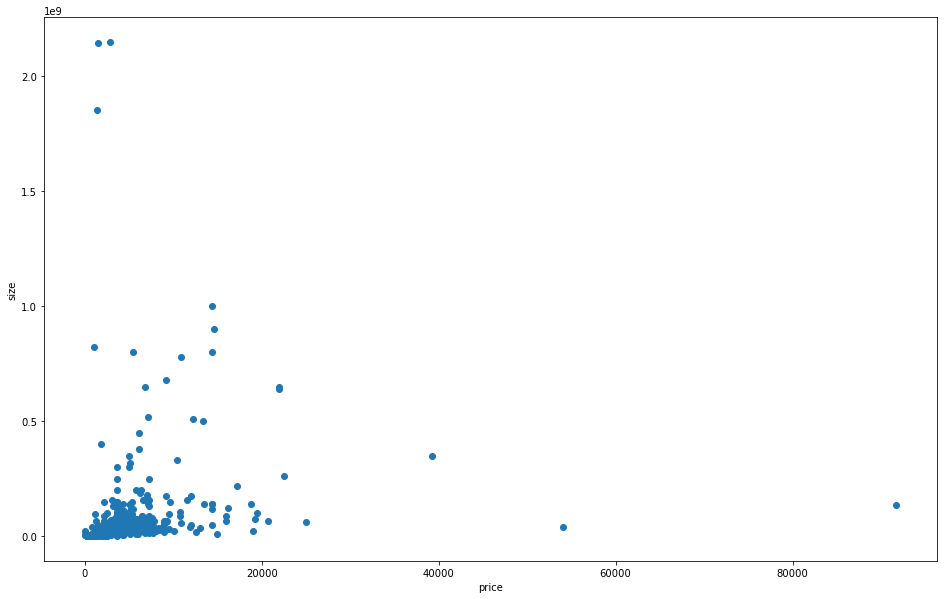

In [15]:
plt.figure(figsize=(16,10))
plt.scatter(df['size'],df['price'])
plt.xlabel('price')
plt.ylabel('size')
plt.show()

In [16]:
df5['size'].unique()

array([1750, 1615,  807, ..., 1108, 1449, 5446], dtype=int64)

In [17]:
df5['price_per_sqft']=df5['price']/df5['size']
df5

,bedrooms,bath,size,price,loc,price_per_sqft
0,3.0,2.0,1750,9500000,MotijheelExtension,5428.571429
1,3.0,2.0,1615,9500000,MotijheelExtension,5882.352941
3,2.0,2.0,807,5200000,Sector5,6443.618340
4,4.0,4.0,3100,40000000,BlockG,12903.225806
5,3.0,3.0,1300,6600000,EastManiknagar,5076.923077
...,...,...,...,...,...,...
8715,3.0,2.0,1025,4000000,MiddlePaikpara,3902.439024
8716,4.0,4.0,3000,32500000,Sector13,10833.333333
8717,3.0,4.0,1695,13500000,BlockF,7964.601770
8718,3.0,3.0,1150,4500000,Section12,3913.043478


In [18]:
len(df5['loc'].unique())

529

In [19]:
df5.loc = df5['loc'].apply(lambda x: x.strip())
location_stats = df5.groupby('loc')['loc'].agg('count').sort_values(ascending=False)
location_stats

loc
Sector10                    180
Pallabi                     141
Ashkona                     102
Section12                   102
BlockC                       98
                           ... 
KaziAlauddinRoad              1
KathalBaganSonargaonRoad      1
Katabon                       1
KalachandpurMainRoad          1
ShahbaghRoad                  1
Name: loc, Length: 529, dtype: int64

In [20]:
len(location_stats[location_stats<=10])

409

In [21]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

loc
RoadNo6                     10
WestNakhalpara              10
Sector1                     10
Vatara                      10
Gandaria                    10
                            ..
KaziAlauddinRoad             1
KathalBaganSonargaonRoad     1
Katabon                      1
KalachandpurMainRoad         1
ShahbaghRoad                 1
Name: loc, Length: 409, dtype: int64

In [22]:
df5['loca']=df5['loc']

In [23]:

df5.loca=df5.loca.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.loca.unique())


121

In [24]:
df5

,bedrooms,bath,size,price,loc,price_per_sqft,loca
0,3.0,2.0,1750,9500000,MotijheelExtension,5428.571429,other
1,3.0,2.0,1615,9500000,MotijheelExtension,5882.352941,other
3,2.0,2.0,807,5200000,Sector5,6443.618340,Sector5
4,4.0,4.0,3100,40000000,BlockG,12903.225806,BlockG
5,3.0,3.0,1300,6600000,EastManiknagar,5076.923077,other
...,...,...,...,...,...,...,...
8715,3.0,2.0,1025,4000000,MiddlePaikpara,3902.439024,MiddlePaikpara
8716,4.0,4.0,3000,32500000,Sector13,10833.333333,Sector13
8717,3.0,4.0,1695,13500000,BlockF,7964.601770,BlockF
8718,3.0,3.0,1150,4500000,Section12,3913.043478,Section12


In [29]:
df5[(df5.size/df5.bedrooms)<1000].head()

,bedrooms,bath,size,price,loc,price_per_sqft,loca
1128,40.0,10.0,19000,25000000,Ashulia,1315.789474,other
1363,42.0,10.0,19440,100000000,SouthBanasreeProject,5144.032922,SouthBanasreeProject
1569,40.0,10.0,16000,65000000,SouthBanasreeProject,4062.500000,SouthBanasreeProject
2461,48.0,10.0,8880,36000000,NorthMugdapara,4054.054054,other
4318,46.0,10.0,19200,75000000,Section1,3906.250000,Section1


In [30]:
df6 = df5[~(df5.size/df5.bedrooms<1000)]
df6

,bedrooms,bath,size,price,loc,price_per_sqft,loca
0,3.0,2.0,1750,9500000,MotijheelExtension,5428.571429,other
1,3.0,2.0,1615,9500000,MotijheelExtension,5882.352941,other
3,2.0,2.0,807,5200000,Sector5,6443.618340,Sector5
4,4.0,4.0,3100,40000000,BlockG,12903.225806,BlockG
5,3.0,3.0,1300,6600000,EastManiknagar,5076.923077,other
...,...,...,...,...,...,...,...
8715,3.0,2.0,1025,4000000,MiddlePaikpara,3902.439024,MiddlePaikpara
8716,4.0,4.0,3000,32500000,Sector13,10833.333333,Sector13
8717,3.0,4.0,1695,13500000,BlockF,7964.601770,BlockF
8718,3.0,3.0,1150,4500000,Section12,3913.043478,Section12


In [31]:
df6.price_per_sqft.describe()

count    5.605000e+03
mean     9.433557e+03
std      1.498302e+05
min      8.000000e+02
25%      4.724409e+03
50%      5.769231e+03
75%      7.490637e+03
max      1.100000e+07
Name: price_per_sqft, dtype: float64

In [32]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('loca'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(4515, 7)

In [33]:
df7['size']=df7['size'].astype(float)
df7.dtypes

bedrooms          float64
bath              float64
size              float64
price               int64
loc                object
price_per_sqft    float64
loca               object
dtype: object

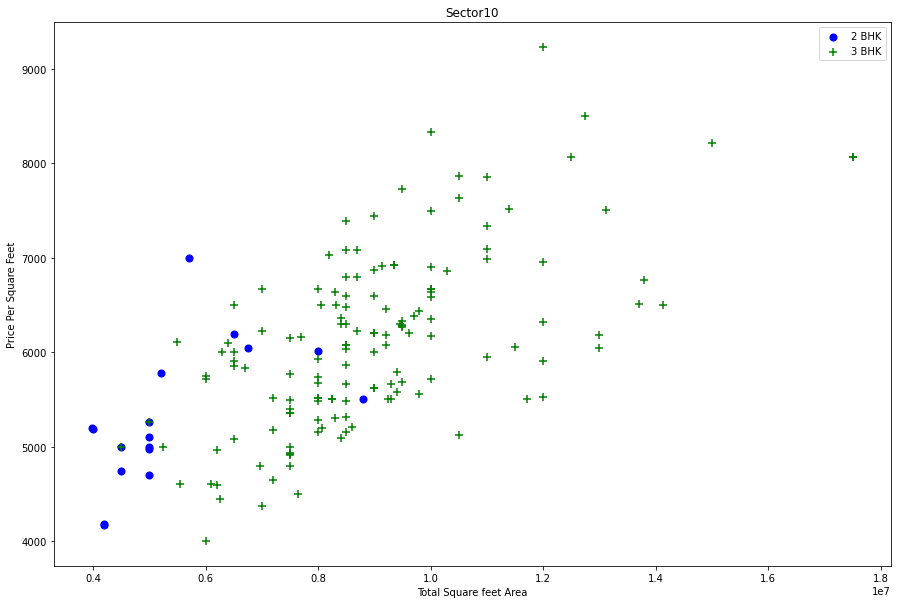

In [34]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.loca==location) & (df.bedrooms==2)]
    bhk3=df[(df.loca==location) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.price,bhk2.price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.price,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Sector10")

In [35]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('loca'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(3355, 7)

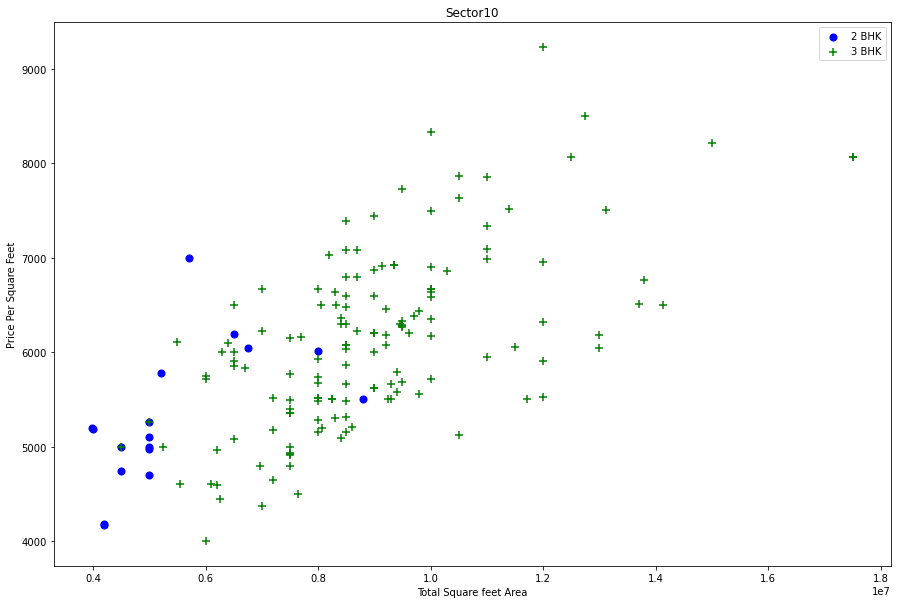

In [36]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.loca==location) & (df.bedrooms==2)]
    bhk3=df[(df.loca==location) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.price,bhk2.price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.price,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Sector10")

Text(0, 0.5, 'Count')

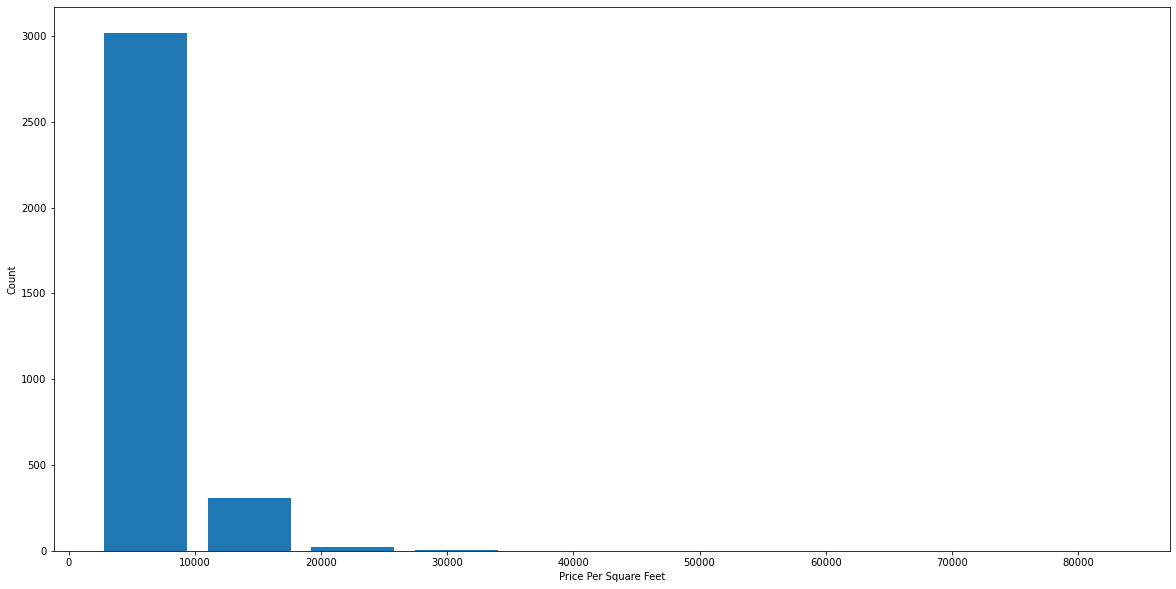

In [37]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

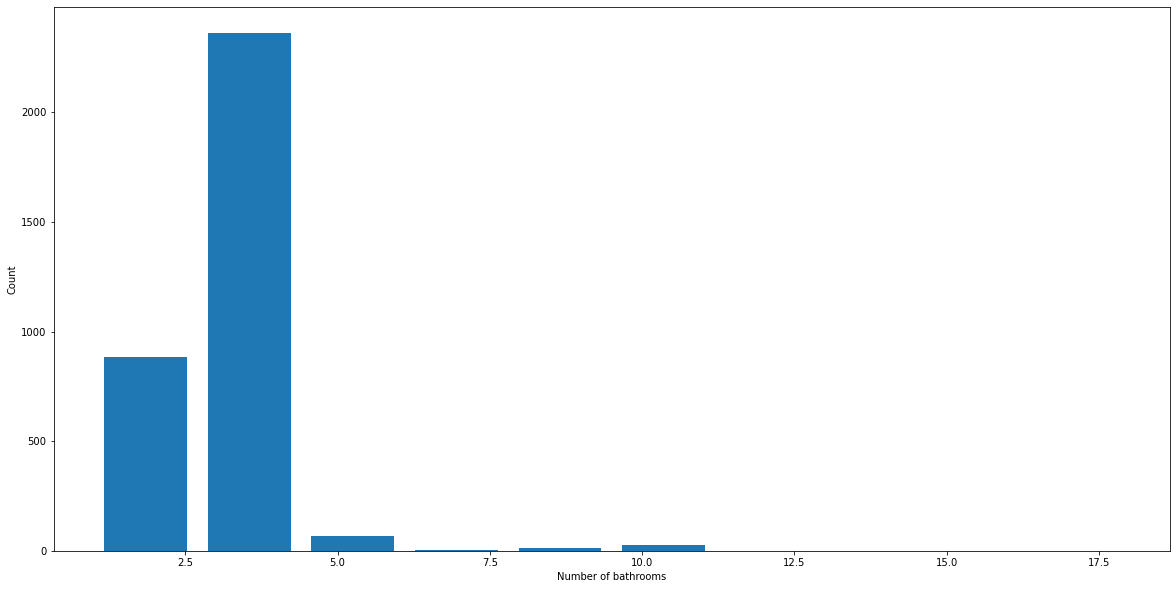

In [38]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [39]:
df10 = df8.drop(['loc','price_per_sqft'],axis='columns')
df10.head(3)

,bedrooms,bath,size,price,loca
0,3.0,3.0,1200.0,6000000,AhmedNagar
1,3.0,3.0,975.0,4500000,AhmedNagar
2,3.0,2.0,1100.0,5000000,AhmedNagar


In [40]:
dummies = pd.get_dummies(df10.loca)

In [41]:
dummies

,AhmedNagar,Ashkona,BaitulAmanHousingSociety,BankColony,BankTown,BashaboMadartekRoad,BlockA,BlockB,BlockC,BlockD,...,Taltola,Tejkunipara,UttarBadda,Wari,WestAgargaon,WestDhanmondiandShangkar,WestKazipara,WestRampura,WestShewrapara,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11

,bedrooms,bath,size,price,loca,AhmedNagar,Ashkona,BaitulAmanHousingSociety,BankColony,BankTown,...,TajmahalRoad,Taltola,Tejkunipara,UttarBadda,Wari,WestAgargaon,WestDhanmondiandShangkar,WestKazipara,WestRampura,WestShewrapara
0,3.0,3.0,1200.0,6000000,AhmedNagar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,975.0,4500000,AhmedNagar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,1100.0,5000000,AhmedNagar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,1100.0,5200000,AhmedNagar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,775.0,3400000,AhmedNagar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,3.0,3.0,1780.0,16000000,other,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4506,3.0,4.0,1400.0,12500000,other,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4507,3.0,3.0,2650.0,37000000,other,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4509,3.0,3.0,2235.0,26000000,other,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df12 = df11.drop('loca',axis='columns')
df12.head(2)

,bedrooms,bath,size,price,AhmedNagar,Ashkona,BaitulAmanHousingSociety,BankColony,BankTown,BashaboMadartekRoad,...,TajmahalRoad,Taltola,Tejkunipara,UttarBadda,Wari,WestAgargaon,WestDhanmondiandShangkar,WestKazipara,WestRampura,WestShewrapara
0,3.0,3.0,1200.0,6000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,975.0,4500000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X = df12.drop(['price'],axis='columns')

X.head(3)

,bedrooms,bath,size,AhmedNagar,Ashkona,BaitulAmanHousingSociety,BankColony,BankTown,BashaboMadartekRoad,BlockA,...,TajmahalRoad,Taltola,Tejkunipara,UttarBadda,Wari,WestAgargaon,WestDhanmondiandShangkar,WestKazipara,WestRampura,WestShewrapara
0,3.0,3.0,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,975.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,1100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y = df12.price
y.head(3)

0    6000000
1    4500000
2    5000000
Name: price, dtype: int64

In [46]:
df13=df12=df12.drop(['price'],axis='columns')

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [48]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7690082173899218

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.38483064, 0.49095736, 0.6842096 , 0.52302864, 0.65502206])

In [50]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.547610,{'normalize': True}
1,lasso,0.547610,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.742687,"{'criterion': 'mse', 'splitter': 'random'}"


In [57]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [63]:
predict_price('Sector10',1500, 4, 5)

3302596153.1971445

In [51]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.038748137108792845

In [55]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return clf.predict([x])[0]

In [53]:
X.shape


(3355, 123)

In [216]:
X_train.shape

(2692, 123)

In [217]:
y_train.shape

(2692,)

In [56]:
predict_price('sector10',2000, 3, 3)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [219]:
predict_price('AhmedNagar',2000, 3, 3)

-2897862632.0482287

In [220]:
predict_price('Sector10',2000, 3, 3)

-2897954166.9178114

In [221]:
df13

,bedrooms,bath,size,AhmedNagar,Ashkona,BaitulAmanHousingSociety,BankColony,BankTown,BashaboMadartekRoad,BlockA,...,TajmahalRoad,Taltola,Tejkunipara,UttarBadda,Wari,WestAgargaon,WestDhanmondiandShangkar,WestKazipara,WestRampura,WestShewrapara
0,3.0,3.0,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,975.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,1100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,1100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,775.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,3.0,3.0,1780.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4514,3.0,4.0,1400.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4515,3.0,3.0,2650.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4517,3.0,3.0,2235.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [223]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [224]:
y_pred = regressor.predict(X_test)

In [225]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
4103,25000000,2.850000e+07
2050,3000000,2.950000e+06
795,5500000,7.000000e+06
1876,3500000,3.000000e+06
1893,5362500,6.056700e+06
...,...,...
1283,4500000,4.500000e+06
157,7475000,8.109091e+06
3451,6500000,7.400000e+06
3844,11550000,7.480000e+06


In [226]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.05794947994056464

In [227]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return clf.predict([x])[0]

In [228]:
predict_price('AhmedNagar',2000, 3, 3)

1400000

In [229]:
predict_price('AhmedNagar',1600, 3, 4)

1400000

In [230]:
predict_price('Sector10',2000, 3, 4)

1400000

In [231]:
df13

,bedrooms,bath,size,AhmedNagar,Ashkona,BaitulAmanHousingSociety,BankColony,BankTown,BashaboMadartekRoad,BlockA,...,TajmahalRoad,Taltola,Tejkunipara,UttarBadda,Wari,WestAgargaon,WestDhanmondiandShangkar,WestKazipara,WestRampura,WestShewrapara
0,3.0,3.0,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,975.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,1100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,1100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,775.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,3.0,3.0,1780.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4514,3.0,4.0,1400.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4515,3.0,3.0,2650.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4517,3.0,3.0,2235.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
_model = DecisionTreeRegressor()
_model.fit(train_X, train_y)
_model.predict(X)

array([ 6000000.,  6056700.,  4975000., ..., 37000000., 37000000.,
        8170000.])

In [233]:
print("Making predictions for the following 5 houses:")
print(df13.head(10))
print("The predictions are")
print(_model.predict(df13.head(10)))

Making predictions for the following 5 houses:
   bedrooms  bath    size  AhmedNagar  Ashkona  BaitulAmanHousingSociety  \
0       3.0   3.0  1200.0           1        0                         0   
1       3.0   3.0   975.0           1        0                         0   
2       3.0   2.0  1100.0           1        0                         0   
3       3.0   3.0  1100.0           1        0                         0   
4       2.0   2.0   775.0           1        0                         0   
5       2.0   2.0   850.0           1        0                         0   
6       3.0   3.0  1100.0           1        0                         0   
7       3.0   3.0  1300.0           1        0                         0   
8       3.0   2.0  1100.0           1        0                         0   
9       3.0   3.0  1375.0           1        0                         0   

   BankColony  BankTown  BashaboMadartekRoad  BlockA  ...  TajmahalRoad  \
0           0         0                  

In [234]:
def predict_price(bhk,bath,sqft,location):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return _model.predict([x])[0]

In [235]:
predict_price(3, 4,2000,'Sector10')

2000000.0

In [236]:
predict_price(4, 6,2000,'Sector10')

2000000.0

In [237]:
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X, y)

In [ ]:
model.coef_